In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile
import random
from utils import *
import matplotlib.ticker as ticker

In [ ]:
import os
from cmdstanpy import install_cmdstan, CmdStanModel
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import stability.ipynb

mixture_gaussian_model_code = """
parameters {
    vector[1] y; // 128-dimensional vector
}
model {
    // Mixture components
    real mu1_first = 2; // Mean of the first Gaussian component for the first dimension
    real mu1_other = 0; // Mean of the first Gaussian component for other dimensions
    vector[1] mu1; // Mean of the first Gaussian component for all dimensions
    vector[1] mu2; // Mean of the second Gaussian component for all dimensions
    
    // Assigning means based on dimension
    for (i in 1:1) {
        if (i == 1) {
            mu1[i] = mu1_first;
        } else {
            mu1[i] = mu1_other;
        }
    }
    
    mu2 = -mu1; // Mean of the second Gaussian component
    
    // Standard deviation for both components
    real sigma = 1;
    
    // Mixture weights
    real theta1 = 0.5; // Weight for the first Gaussian component
    real theta2 = 0.5; // Weight for the second Gaussian component
    
    // Define mixture model for each dimension of y
    for (i in 1:1) {
        target += log(theta1 * exp(normal_lpdf(y[i] | mu1[i], sigma)) +
                      theta2 * exp(normal_lpdf(y[i] | mu2[i], sigma)));
    }
}
"""
model_file = 'mg.stan'
with open(model_file, 'w') as f:
    f.write(mixture_gaussian_model_code)

model = CmdStanModel(stan_file=model_file)
fit = model.sample(iter_sampling=20000, chains=4)
samples = fit.draws_pd()


In [9]:
num_iter = 10000 
number_samples_hist = int(0.2 * num_iter)
min_number_samples_hist = int(0.1 * num_iter)
number_hist = 50
bin_num = 100
index_hist = np.linspace(number_samples_hist, num_iter, number_hist).astype(int)
realSamples = np.load('128_MixedGaussian.npy')
histY, bin_edges_Y = np.histogram(realSamples, bins=bin_num, density=True) 

def calculate_distances(key, Xsamples):
    if is_constant(key, Xsamples[0,:,:]):
        return np.ones(number_hist) 
    else:
        distances_random = np.zeros(number_hist)
        projected_sample_random = np.matmul(Xsamples, direction/2)

        for i in range(number_hist):
            distances_random[i] = TV_estimation(projected_sample_random[:, min_number_samples_hist:index_hist[i]].reshape(-1,1), histY, bin_edges_Y, bin_num)
        return 0.5 * distances_random

def is_constant(key, Xsamples):
    unique_samples = np.unique(Xsamples, axis=0)
    if unique_samples.shape[0] < 5:
        print(f"{key}: unique_samples is too limited: {unique_samples.shape[0]}")
        return True
    else:
        return False

0       -0.450527
1       -0.688490
2       -0.137453
3       -1.702410
4       -2.357640
           ...   
79995    2.565800
79996    1.965190
79997    0.221150
79998   -3.178860
79999   -3.374850
Name: y[1], Length: 80000, dtype: float64


(array([1.00254566e-04, 0.00000000e+00, 4.01018266e-04, 8.02036531e-04,
        1.65420035e-03, 5.16311017e-03, 6.96769236e-03, 1.45870394e-02,
        2.60661873e-02, 4.22572997e-02, 6.51654682e-02, 8.82741457e-02,
        1.17648734e-01, 1.51885668e-01, 1.71284927e-01, 1.95546532e-01,
        1.94493859e-01, 1.98905060e-01, 1.83014711e-01, 1.62713161e-01,
        1.33288446e-01, 1.04264749e-01, 7.57924522e-02, 6.47143226e-02,
        5.28842838e-02, 5.75962484e-02, 6.69700504e-02, 9.34372559e-02,
        1.14891733e-01, 1.42712375e-01, 1.71335054e-01, 1.85120057e-01,
        1.99005314e-01, 1.84368148e-01, 1.71986709e-01, 1.53991014e-01,
        1.29378518e-01, 1.00204439e-01, 6.71204322e-02, 4.69692644e-02,
        2.96252244e-02, 1.81962038e-02, 9.72469294e-03, 4.81221919e-03,
        2.90738243e-03, 1.45369121e-03, 3.00763699e-04, 1.00254566e-04,
        5.01272832e-05, 5.01272832e-05]),
 array([-6.15774  , -5.9083748, -5.6590096, -5.4096444, -5.1602792,
        -4.910914 , -4.661

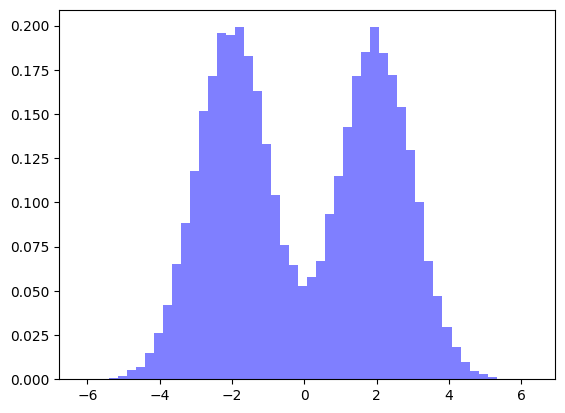

In [5]:
print(samples['y[1]'])
plt.hist(samples['y[1]'], bins=50, density=True, alpha=0.5, color='blue')

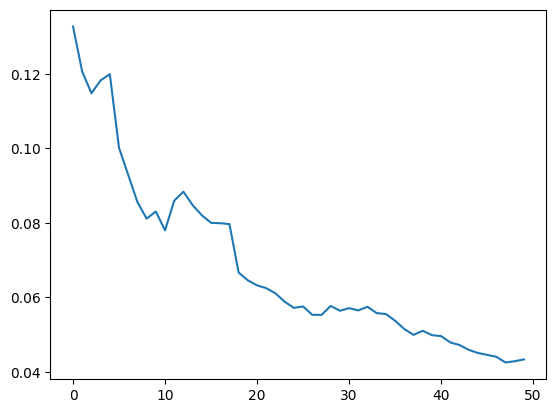

In [6]:
nuts = np.array(samples['y[1]'])
distances_random = np.zeros(number_hist)
for i in range(number_hist):
    distances_random[i] = 0.5*TV_estimation(nuts[min_number_samples_hist:index_hist[i]], histY, bin_edges_Y, bin_num)
plt.plot(distances_random,label = 'adaptive_small')

(array([1.34765310e-03, 3.67541754e-04, 1.34765310e-03, 1.59268093e-03,
        3.79793145e-03, 3.79793145e-03, 4.90055671e-03, 5.14558455e-03,
        1.04136830e-02, 1.71519485e-02, 2.76881454e-02, 3.55290362e-02,
        4.06746207e-02, 4.98631646e-02, 6.44423208e-02, 6.83627662e-02,
        8.46571172e-02, 8.66173399e-02, 9.22529801e-02, 1.03401747e-01,
        1.09159901e-01, 1.12222749e-01, 1.30844864e-01, 1.42851228e-01,
        1.52774856e-01, 1.70049318e-01, 1.91979309e-01, 1.97859977e-01,
        2.02515506e-01, 2.03618131e-01, 2.09008744e-01, 2.02270478e-01,
        1.90754170e-01, 1.87078753e-01, 1.69069207e-01, 1.57675412e-01,
        1.53509939e-01, 1.27046933e-01, 1.21411293e-01, 1.17858389e-01,
        1.09037387e-01, 1.01073982e-01, 9.22529801e-02, 8.62497982e-02,
        7.49785177e-02, 6.35847234e-02, 5.53762909e-02, 5.36610960e-02,
        4.88830532e-02, 4.22673017e-02, 3.95719955e-02, 3.88369120e-02,
        4.50851218e-02, 5.10883037e-02, 7.22832115e-02, 7.730628

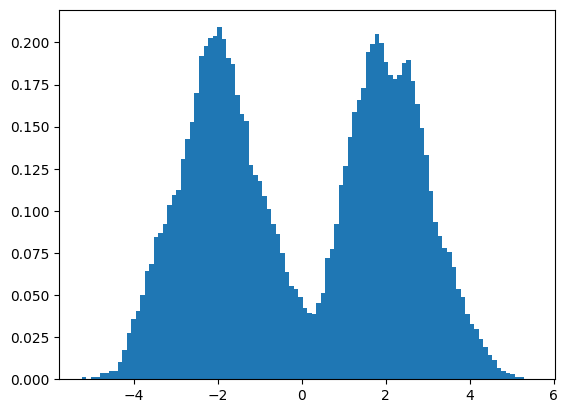

In [7]:
a = np.load('./samples/adaptive_1_128_MixedGaussian_step_size_10__samples.npy')
plt.hist(a[:,1000:,0].reshape(-1), density=True, bins=100)

In [10]:
import numpy as np

# Parameters for the Gaussian components
mu1 = 2
mu2 = -2
sigma = 1

# Number of samples to generate
num_samples = 200000

# Generate uniform random numbers between 0 and 1
uniform_samples = np.random.rand(num_samples)

# Initialize array for samples
samples = np.zeros(num_samples)

# Decide which Gaussian to sample from based on the uniform samples
samples[uniform_samples < 0.5] = np.random.normal(mu1, sigma, size=np.sum(uniform_samples < 0.5))
samples[uniform_samples >= 0.5] = np.random.normal(mu2, sigma, size=np.sum(uniform_samples >= 0.5))

# Save samples to a .npy file
np.save('mixture_gaussian_samples.npy', samples)

print(f'Saved {num_samples} samples to mixture_gaussian_samples.npy')


Saved 200000 samples to mixture_gaussian_samples.npy


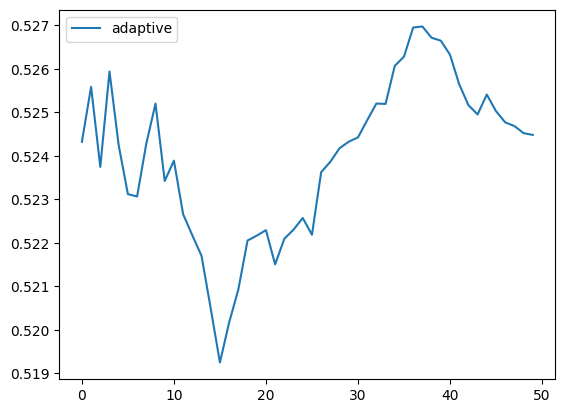

In [11]:
a = np.load('../Adaptive_0.2_1_128_MixedGaussian.npy')
plt.plot(calculate_distances('adaptive',a),label = 'adaptive')
plt.legend()
plt.show()

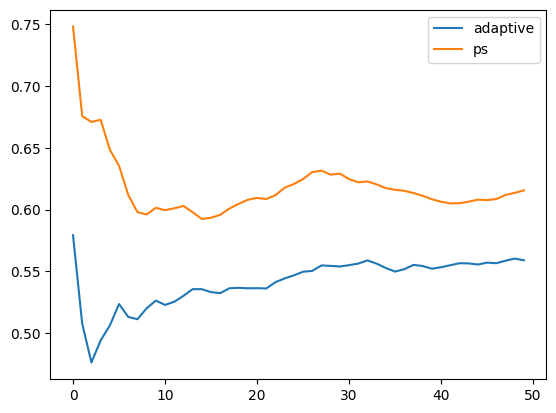

In [107]:
a = np.load('AdaptiveSampling/Adaptive_1e-3_0_128_MixedGaussian.npy')
plt.plot(calculate_distances('adaptive',a),label = 'adaptive')
a = np.load('AdaptiveSampling/PS_1e-3_0_128_MixedGaussian.npy')
plt.plot(calculate_distances('ps',a),label = 'ps')
plt.legend()
plt.show()